In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

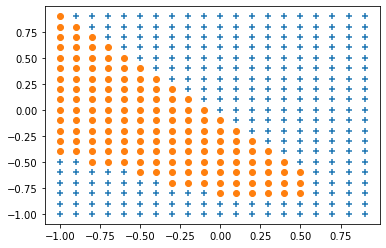

In [4]:
#신경망 분류
%matplotlib inline

#x, y 값
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0, 1.0, 0.1)

#가중치
w_im = np.array([[1.0,2.0],
                [2.0, 3.0]])
w_mo = np.array([[-1.0, 1.0],
                [1.0,-1.0]])
#편향
b_im = np.array([0.3,-0.3])
b_mo = np.array([0.4,0.1])

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u)/np.sum(np.exp(u))

x_1 = []
x_2 = []
y_1 = []
y_2 = []

for i in range(20):
    for j in range(20):
        
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        #확률의 크기를 비교해 분류함
        if out[0] > out [1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])

plt.scatter(x_1, y_1, marker = "+")
plt.scatter(x_2, y_2, marker = "o")
plt.show()





In [1]:
#출력층 구현

#출력층
class OutuptLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u
    
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta) #w 
        self.grad_b = np.sum(delta, axis = 0) #b 
        
        self.grad_x = np.dot(delta, self.w.T) # 입력
        
    def update(self, eta):
        self.w -= eta * self.grad_w 
        self.b -= eta * self.grad_b

        #은닉층
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
    
  

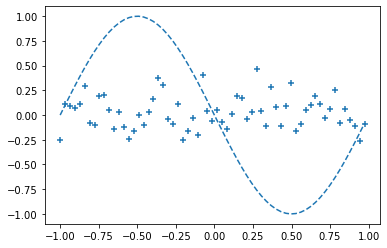

Epoch:0/2000 Error:0.27952447796914237


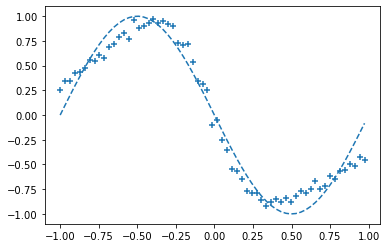

Epoch:200/2000 Error:0.009578949786520248


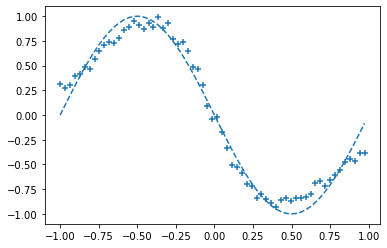

Epoch:400/2000 Error:0.006424145222489338


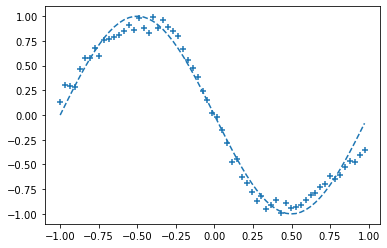

Epoch:600/2000 Error:0.004628776338682262


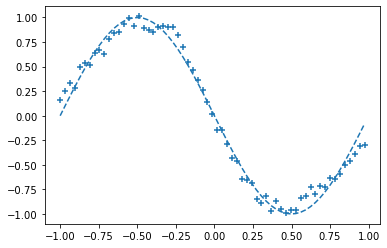

Epoch:800/2000 Error:0.0038360937056655933


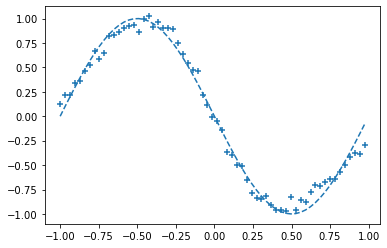

Epoch:1000/2000 Error:0.0036484922710263933


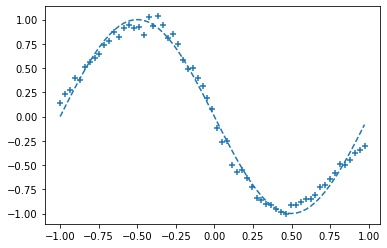

Epoch:1200/2000 Error:0.0032955954709457283


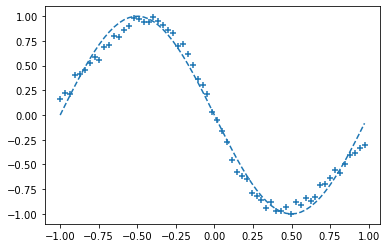

Epoch:1400/2000 Error:0.0035379704045779155


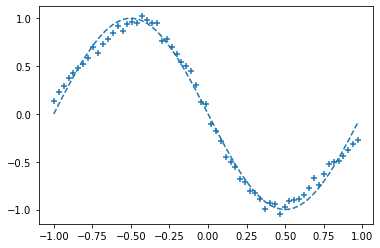

Epoch:1600/2000 Error:0.0028737126749922804


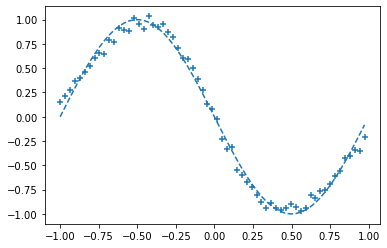

Epoch:1800/2000 Error:0.002291952616638178


In [10]:
#역전파 구현 (회귀)

input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi #입력 범위를 -1 ~ 1 사이로 만들기
n_data = len(correct_data)

n_in = 1
n_mid = 3
n_out = 1

wb_width = 0.01
eta = 0.1 #학습률
epoch = 2000
interval = 200


class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u
    
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta) #w 
        self.grad_b = np.sum(delta, axis = 0) #b 
        
        self.grad_x = np.dot(delta, self.w.T) # 입력
        
    def update(self, eta):
        self.w -= eta * self.grad_w 
        self.b -= eta * self.grad_b

middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    #결과 표시
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x= input_data[idx:idx+1]
        t = correct_data[idx:idx+1]
        
        #순전파
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        #가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            y = output_layer.y.reshape(-1) # 행렬을 벡터로 되돌림
            
            total_error += 1.0/2.0*np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle = "dashed")
        plt.scatter(plot_x, plot_y, marker = "+")
        plt.show()
        
        print("Epoch:" + str(i) + "/" + str(epoch),
             "Error:" + str(total_error/n_data))





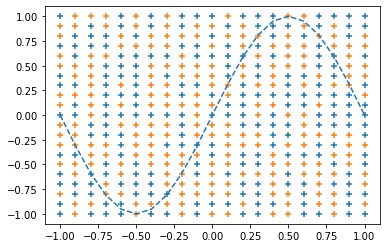

Epoch:0/100 Error:0.7312369782358205


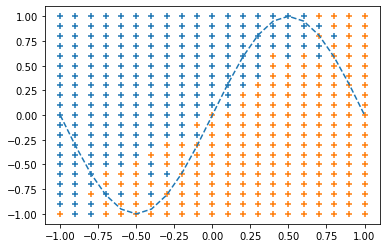

Epoch:10/100 Error:0.3993134720971785


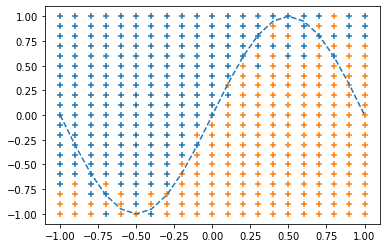

Epoch:20/100 Error:0.25021443329466


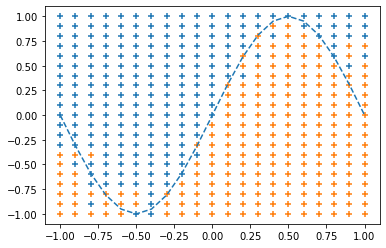

Epoch:30/100 Error:0.1887145625397911


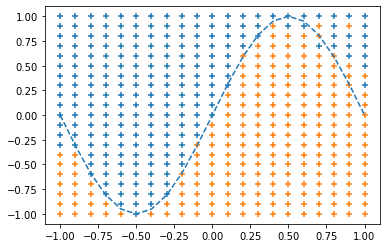

Epoch:40/100 Error:0.15394405395368338


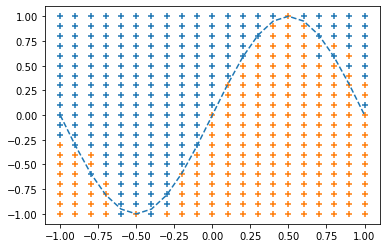

Epoch:50/100 Error:0.1161865311321715


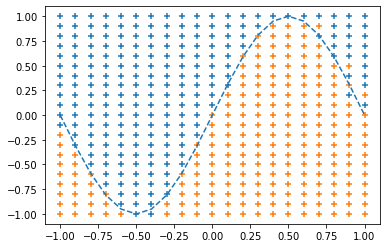

Epoch:60/100 Error:0.09609985263132916


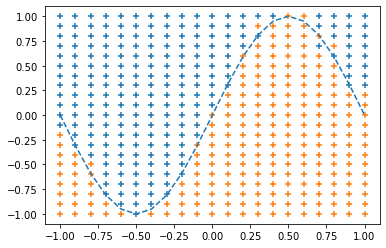

Epoch:70/100 Error:0.07986525408933509


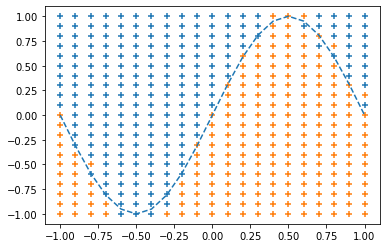

Epoch:80/100 Error:0.07758918098412254


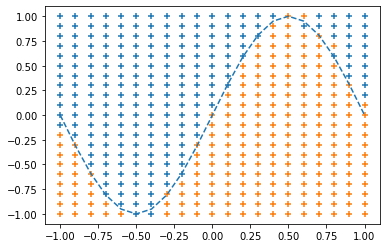

Epoch:90/100 Error:0.07470168504757047


In [11]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):
            correct_data.append([0,1])
        else:
            correct_data.append([1,0])

n_data = len(correct_data)

input_data = np.array(input_data)
correct_data = np.array(correct_data)

n_in = 2
n_mid = 6
n_out = 2
wb_width = 0.01
eta = 0.1
epoch = 100
interval = 10


class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/ np.sum(np.exp(u), axis= 1, keepdims = True) # softmax 함수
    
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta) #w 
        self.grad_b = np.sum(delta, axis = 0) #b 
        
        self.grad_x = np.dot(delta, self.w.T) # 입력
        
    def update(self, eta):
        self.w -= eta * self.grad_w 
        self.b -= eta * self.grad_b

middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

#학습
sin_data = np.sin(np.pi * X) # 결과 검증용

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    #결과 표시
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        x= input_data[idx]
        t = correct_data[idx]
        
        #순전파
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)
        
        #가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            y = output_layer.y.reshape(-1) # 행렬을 벡터로 되돌림
            
            #교차 엔트로피 오차
            total_error += -np.sum(t * np.log(y + 1e-7))
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])

    if i % interval == 0:
        plt.plot(X, sin_data, linestyle = "dashed")
        plt.scatter(x_1, y_1, marker = "+")
        plt.scatter(x_2, y_2, marker = "+")
        plt.show()
        
        print("Epoch:" + str(i) + "/" + str(epoch),
             "Error:" + str(total_error/n_data))






Epoch:0/1000 Error_train:1.0972311927612433 Error_test:1.096332844591836
Epoch:100/1000 Error_train:0.027556221292618328 Error_test:0.06525301979417805
Epoch:200/1000 Error_train:0.012016370393371363 Error_test:0.07361953231009466
Epoch:300/1000 Error_train:0.006327718370308349 Error_test:0.08704511112003162
Epoch:400/1000 Error_train:0.0038520342037385216 Error_test:0.09952671160053833
Epoch:500/1000 Error_train:0.0025469280775856605 Error_test:0.11095786217074907
Epoch:600/1000 Error_train:0.001836617911012251 Error_test:0.12174372039138333
Epoch:700/1000 Error_train:0.0014084803463168902 Error_test:0.13181101552414332
Epoch:800/1000 Error_train:0.0011234553434231421 Error_test:0.14031855872700608
Epoch:900/1000 Error_train:0.0009247722391832451 Error_test:0.14922883617288685


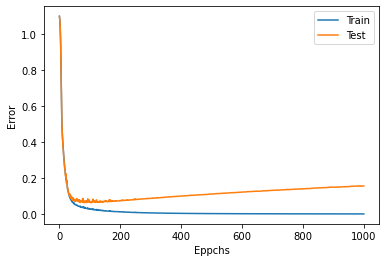

Accuracy Train: 100.0% Accuracy Test: 94.66666666666667%


In [5]:
# chapter 6

iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target #품종 인덱스는 iris_data.target에 있음.
n_data = len(correct)


#입력 데이터 표준화
ave_input = np.average(input_data, axis = 0)
std_input = np.std(input_data, axis = 0)
input_data = (input_data - ave_input) / std_input

#정답을 원핫 인코딩으로 변환
correct_data = np.zeros((n_data, 3))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0

#훈련 데이터와 테스트 데이터 
index = np.arange(n_data)
index_train = index[index%2 == 0]
index_test = index[index%2 != 0]

input_train = input_data[index_train, :]
correct_train = correct_data[index_train, :]
input_test = input_data[index_test, :]
correct_test = correct_data[index_test, :]

n_train = input_train.shape[0]
n_test = input_test.shape[0]

#각 설정 값

n_in = 4
n_mid = 25
n_out = 3

wb_width = 0.1
eta = 0.01
epoch = 1000
batch_size = 8
interval = 100

#각 층의 부모 클래스 생성
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)

    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b        
#은닉층
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) #ReLU
    
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0 ,0 , 1) #ReLU 미분 
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        self.grad_x = np.dot(delta, self.w.T)

#출력층
class OutputLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) / np.sum(np.exp(u), axis = 1, keepdims = True)
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        self.grad_x = np.dot(delta, self.w.T)
        
middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid, n_out)

def forward_propagation(x):
    middle_layer_1.forward(x)
    middle_layer_2.forward(middle_layer_1.y)
    output_layer.forward(middle_layer_2.y)

def backpropagation(t):
    output_layer.backward(t)
    middle_layer_2.backward(output_layer.grad_x)
    middle_layer_1.backward(output_layer.grad_x)
    
#가중치와 편향 수정
def update_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)

#교차 엔트로피 계산
def get_error(t, batch_size):
    return -np.sum(t * np.log(output_layer.y + 1e-7)) / batch_size


#오차 기록용
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

#학습과 경과 기록
n_batch = n_train // batch_size # 1에포크당 배치 수
for i in range(epoch):
    
    #오차 계측
    forward_propagation(input_train)
    error_train = get_error(correct_train, n_train)
    forward_propagation(input_test)
    error_test = get_error(correct_test, n_test)
    
    #오차 기록 
    test_error_x.append(i)
    test_error_y.append(error_test)
    train_error_x.append(i)
    train_error_y.append(error_train)
    
    #경과 표시
    if i % interval == 0:
        print("Epoch:" + str(i) + "/" + str(epoch),
             "Error_train:" +  str(error_train),
             "Error_test:" + str(error_test))

    index_random = np.arange(n_train)
    np.random.shuffle(index_random) # 인덱스 임의 섞기
    for j in range(n_batch):
        #미니 배치 샘플 추출
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        #순전파와 역전파
        forward_propagation(x)
        backpropagation(t)
        
        #가중치와 편향 수정
        update_wb()

#기록된 오차를 그래프로 표시
plt.plot(train_error_x, train_error_y, label = "Train")
plt.plot(test_error_x, test_error_y, label = "Test")
plt.legend()

plt.xlabel("Eppchs")
plt.ylabel("Error")

plt.show()

#정답률 측정
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis = 1) == np.argmax(correct_train, axis = 1))
forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis = 1) == np.argmax(correct_test, axis = 1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
     "Accuracy Test:", str(count_test/n_test*100) + "%")





Epoch:0/1000 Error_train:1.093435050579888 Error_test:1.0912241423404998
Epoch:100/1000 Error_train:1.2868263057405447 Error_test:1.2868263057405447
Epoch:200/1000 Error_train:2.5370118412641167 Error_test:2.5370118412641167
Epoch:300/1000 Error_train:1.123238170613085 Error_test:1.123238170613085
Epoch:400/1000 Error_train:1.8077925288436283 Error_test:1.8077925288436283
Epoch:500/1000 Error_train:3.226906239099884 Error_test:3.226906239099884
Epoch:600/1000 Error_train:1.3063435153118783 Error_test:1.3063435153118783
Epoch:700/1000 Error_train:1.7000909111863962 Error_test:1.7000909111863962
Epoch:800/1000 Error_train:4.1692487838081 Error_test:4.1692487838081
Epoch:900/1000 Error_train:2.465092917537882 Error_test:2.465092917537882


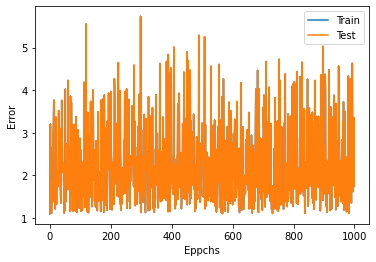

Accuracy Train: 33.33333333333333% Accuracy Test: 33.33333333333333%


In [11]:
# 아다그라드, 드롭아웃 적용해 과적합 수정하기
iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target #품종 인덱스는 iris_data.target에 있음.
n_data = len(correct)


#입력 데이터 표준화
ave_input = np.average(input_data, axis = 0)
std_input = np.std(input_data, axis = 0)
input_data = (input_data - ave_input) / std_input

#정답을 원핫 인코딩으로 변환
correct_data = np.zeros((n_data, 3))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0

#훈련 데이터와 테스트 데이터 
index = np.arange(n_data)
index_train = index[index%2 == 0]
index_test = index[index%2 != 0]

input_train = input_data[index_train, :]
correct_train = correct_data[index_train, :]
input_test = input_data[index_test, :]
correct_test = correct_data[index_test, :]

n_train = input_train.shape[0]
n_test = input_test.shape[0]

#각 설정 값

n_in = 4
n_mid = 25
n_out = 3

wb_width = 0.1
eta = 0.01
epoch = 1000
batch_size = 8
interval = 100

#각 층의 부모 클래스 생성
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        #adagrad 수정! 
        self.h_w = np.zeros((n_upper, n)) + 1e-8
        self.h_b = np.zeros(n) + 1e-8
    def update(self, eta):
        self.h_w += self.grad_w * self.grad_w
        self.w -= eta / np.sqrt(self.h_w) + self.grad_w      
        #adagrad 수정 ! 
        self.h_b += self.grad_b * self.grad_b
        self.b -= eta / np.sqrt(self.h_b) + self.grad_b

#Dropout 수정!
#따로 dropout 층을 만든다 
class Dropout:
    def __init__(self, dropout_ratio):
        self.dropout_ratio = dropout_ratio # dropout_ratio는 뉴런을 제거하는 확률이다.
    def forward(self, x, is_train):  #is_train : 학습할 때는 true
        if is_train:
            rand = np.random.rand(*x.shape)
            self.dropout = np.where(rand > self.dropout_ratio, 1, 0)
            self.y = x * self.dropout
        else:
            self.y = (1-self.dropout_ratio)*x # 1-self.dropout_ratio 를 곱해서 학습할 때와 동등한 결과를 얻는다. 
    def backward(self, grad_y):
        self.grad_x = grad_y * self.dropout  # 제거된 뉴런은 역전파되지 않게 함. 
        
        
#은닉층
class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) #ReLU
    
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0 ,0 , 1) #ReLU 미분 
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        self.grad_x = np.dot(delta, self.w.T)

#출력층
class OutputLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u) / np.sum(np.exp(u), axis = 1, keepdims = True)
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        self.grad_x = np.dot(delta, self.w.T)
        
middle_layer_1 = MiddleLayer(n_in, n_mid)
dropout_1 = Dropout(0.5)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
dropout_2 =  Dropout(0.5)
output_layer = OutputLayer(n_mid, n_out)

def forward_propagation(x, is_train):
    middle_layer_1.forward(x)
    dropout_1.forward(middle_layer_1.y, is_train)
    middle_layer_2.forward(middle_layer_1.y)
    dropout_2.forward(middle_layer_2.y, is_train)
    output_layer.forward(middle_layer_2.y)

def backpropagation(t):
    output_layer.backward(t)
    dropout_2.backward(output_layer.grad_x)
    middle_layer_2.backward(output_layer.grad_x)
    dropout_1.backward(middle_layer_2.grad_x)
    middle_layer_1.backward(output_layer.grad_x)
    
#가중치와 편향 수정
def update_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)

#교차 엔트로피 계산
def get_error(t, batch_size):
    return -np.sum(t * np.log(output_layer.y + 1e-7)) / batch_size


#오차 기록용
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

#학습과 경과 기록
n_batch = n_train // batch_size # 1에포크당 배치 수
for i in range(epoch):
    
    #오차 계측
    forward_propagation(input_train, 1)
    error_train = get_error(correct_train, n_train)
    forward_propagation(input_test, 0)
    error_test = get_error(correct_test, n_test)
    
    #오차 기록 
    test_error_x.append(i)
    test_error_y.append(error_test)
    train_error_x.append(i)
    train_error_y.append(error_train)
    
    #경과 표시
    if i % interval == 0:
        print("Epoch:" + str(i) + "/" + str(epoch),
             "Error_train:" +  str(error_train),
             "Error_test:" + str(error_test))

    index_random = np.arange(n_train)
    np.random.shuffle(index_random) # 인덱스 임의 섞기
    for j in range(n_batch):
        #미니 배치 샘플 추출
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        #순전파와 역전파
        forward_propagation(x, 1 or 0)
        backpropagation(t)
        
        #가중치와 편향 수정
        update_wb()

#기록된 오차를 그래프로 표시
plt.plot(train_error_x, train_error_y, label = "Train")
plt.plot(test_error_x, test_error_y, label = "Test")
plt.legend()

plt.xlabel("Eppchs")
plt.ylabel("Error")

plt.show()

#정답률 측정
forward_propagation(input_train, 1)
count_train = np.sum(np.argmax(output_layer.y, axis = 1) == np.argmax(correct_train, axis = 1))
forward_propagation(input_test, 0)
count_test = np.sum(np.argmax(output_layer.y, axis = 1) == np.argmax(correct_test, axis = 1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
     "Accuracy Test:", str(count_test/n_test*100) + "%")





In [2]:
#7장
#im2col 구현(ver1)

#채널 수 1 배치 사이즈 1 패딩 x 스트라이드 1
def im2col(image, flt_h, flt_w, out_h, out_w):
    
    img_h, img_w = image.shape #입력 이미지의 높이와 너비
    
    #생성되는 행렬 크기
    cols = np.zeros((flt_h*flt_w, out_h * out_w))
    
    for h in range(out_h):
        h_lim = h + flt_h
        for w in range(out_w):
            w_lim = w + flt_w
            cols[:, h*out_w+w] = image[h:h_lim, w:w_lim].reshape(-1)
            
    return cols



In [3]:
#im2col 구현(ver2)

#채널 수 1 배치 사이즈 1 패딩 x 스트라이드 1
def im2col(image, flt_h, flt_w, out_h, out_w):
    
    img_h, img_w = image.shape #입력 이미지의 높이와 너비
    
    #생성되는 행렬 크기
    cols = np.zeros((flt_h*flt_w, out_h * out_w))
    
    for h in range(flt_h):
        h_lim = h + flt_h
        for w in range(flt_w):
            w_lim = w + out_w
            cols[h, w, :, :] = image[h:h_lim, w:w_lim]
    cols = cols.reshape(flt_h*flt_w , out_h * out_w)
            
    return cols

In [4]:
#im2col 구현(ver3)

#배치와 채널을 고려 
#패딩과 스트라이드는 고려 x 
def im2col(image, flt_h, flt_w, out_h, out_w):
        
    n_bt, n_ch, img_h, img_w = images.shape
    
    #생성되는 행렬 크기
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + out_h
        for w in range(flt_w):
            w_lim = w + out_w
            cols[:, :, h, w, :, :] = image[:, :, h:h_lim, w:w_lim]
    cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h * out_w)
                     #(B, C,Fh,Fw,Oh,Ow) -> (C,Fh,Fw,B,Oh,Ow) -> (CFhFwBOhOw)   
    return cols

In [13]:
#im2col 구현(ver4)

#배치와 채널 패딩 스트라이드를 고려 

def im2col(images, flt_h, flt_w, out_h, out_w, stride, pad):
        
    n_bt, n_ch, img_h, img_w = images.shape
    
    img_pad = np.pad(images, [(0,0), (0,0), (pad,pad), (pad,pad)], "constant") #batch , channel 에는 (0,0) (0,0) 으로 패딩을 넣지 않고
    # 순서대로 상하 좌우 에 패딩을 넣는다. 
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + stride*out_h
        for w in range(flt_w):
            w_lim = w + stride*out_w
            cols[:, :, h, w, :, :] = images[:, :, h:h_lim:stride, w:w_lim:stride]
    cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h * out_w)
         #(B, C,Fh,Fw,Oh,Ow) -> (C,Fh,Fw,B,Oh,Ow) -> (CFhFwBOhOw)   
    return cols

In [14]:
img = np.array([[[[1,2,3,4],
                 [5,6,7,8],
                 [9,10,11,12],
                 [13,14,15,16]]]])
cols = im2col(img, 2,2,3,3,1,0)
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [15]:
# col2im 구현 
## 나중에

In [ ]:
#컨볼루션 구현
